In [1]:
import yfinance as yf

ticker = "SPY"
price = yf.download(ticker, start="1970-01-01", auto_adjust=False)["Adj Close"]
price.head()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
1993-01-29,24.452515
1993-02-01,24.626423
1993-02-02,24.678606
1993-02-03,24.939482
1993-02-04,25.043827


In [25]:
import seaborn as sns 
sns.set_style("whitegrid")

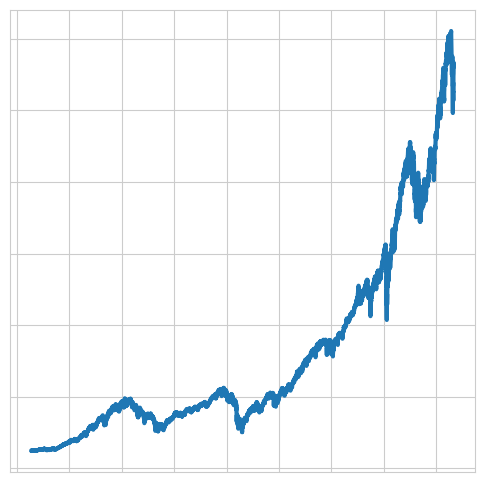

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.lineplot(data=price.SPY, linewidth=3)
# Remove tick and axis labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label
# Remove tick labels but keep the ticks
plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)

#plt.xticks([])  # Remove x-axis ticks
#plt.yticks([])  # Remove y-axis ticks
plt.savefig("spy.png")
plt.show()

In [30]:

from PIL import Image

# Open images
base = Image.open('spy.png')
overlay = Image.open('transformer.png')

# Convert images to RGBA if they aren't already
base = base.convert('RGBA')
overlay = overlay.convert('RGBA')

# Resize overlay if needed
base = base.resize(overlay.size)

# Make overlay partially transparent
# Create a new image with transparency
overlay_with_transparency = Image.new('RGBA', overlay.size, (0,0,0,0))
for x in range(overlay.size[0]):
    for y in range(overlay.size[1]):
        r,g,b,a = overlay.getpixel((x,y))
        # Adjust the 0.5 to change transparency level (0.0 to 1.0)
        overlay_with_transparency.putpixel((x,y), (r,g,b,int(a * 0.5)))

# Paste overlay onto base image
result = Image.alpha_composite(base, overlay_with_transparency)

# Save result
result.save('result.png')

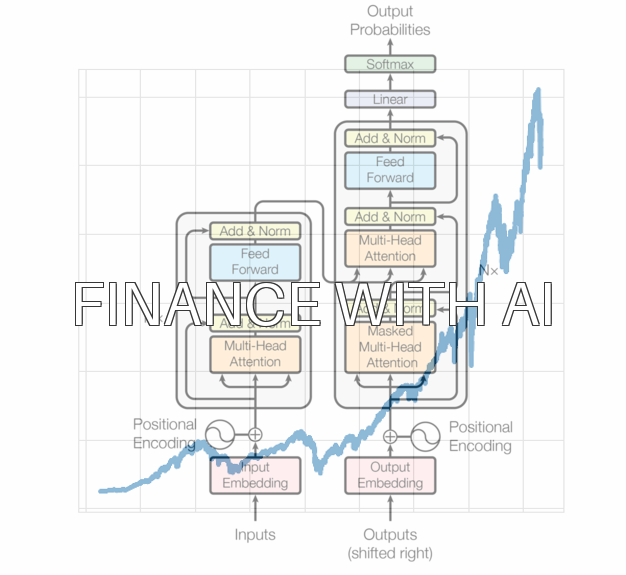

In [34]:
# Open the result image
result = Image.open('result.png')

# Create a drawing context
from PIL import ImageDraw, ImageFont

# Create a drawing object
draw = ImageDraw.Draw(result)

# Try to load a font (use a default if the specific one isn't available)
try:
    # Try to get a bold font for better visibility
    font = ImageFont.truetype("Arial Bold.ttf", 60)
except IOError:
    # Fallback to default font
    font = ImageFont.load_default().font_variant(size=60)


# Text to add
text = "FINANCE WITH AI"

# Get text size using the appropriate method based on PIL version
if hasattr(draw, 'textsize'):
    # Older PIL versions
    text_width, text_height = draw.textsize(text, font=font)
elif hasattr(font, 'getbbox'):
    # Newer PIL versions use getbbox()
    bbox = font.getbbox(text)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
elif hasattr(font, 'getlength'):
    # Alternative method if available
    text_width = font.getlength(text)
    # Approximate height based on font size
    text_height = font.size
else:
    # Fallback to approximation if no method is available
    text_width = len(text) * font.size * 0.6
    text_height = font.size * 1.2

# Calculate position (center of image)
position = ((result.width - text_width) // 2, (result.height - text_height) // 2)

# Add text with outline for better visibility
# First draw black outline
for offset in [(1,1), (-1,1), (1,-1), (-1,-1)]:
    draw.text((position[0]+offset[0], position[1]+offset[1]), text, font=font, fill=(0,0,0,200))

# Then draw the text in white
draw.text(position, text, font=font, fill=(255,255,255,220))

# Save the result
result.save('result_with_text.png')

# Display the image with text
display(Image.open('result_with_text.png'))



In [7]:
ret = 100*price.resample("ME").last().pct_change().dropna()


In [8]:
ret

Ticker,SPY
Date,


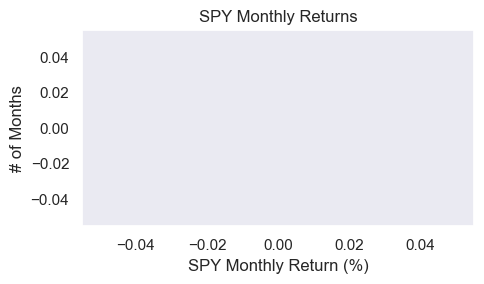

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")
# Create a figure for the histogram with kernel density plot
plt.figure(figsize=(5, 3))
sns.histplot(100*ret.dropna(), kde=True, bins=30, legend=False)
plt.title('SPY Monthly Returns')
plt.xlabel('SPY Monthly Return (%)')
plt.ylabel('# of Months')
plt.tight_layout()
plt.savefig("../posts/02-online-data/spy.jpg")
plt.show()

In [12]:
keep = abs(keep)

In [15]:
(abs(keep) > 1e-6).sum()/(2025-1993)

Ticker
SPY    4.4375
dtype: float64

In [16]:
keep.head()

Ticker,SPY
Date,
1993-01-29,NaN
1993-02-01,7.989953e-07
1993-02-02,1.199510e-07
1993-02-03,4.426467e-07
1993-02-04,7.596711e-07


In [20]:
keep[keep.SPY>1e-5]






Ticker,SPY
Date,
1993-03-19,0.004693
1993-06-18,0.006980
1993-09-17,0.006181
1993-12-17,0.006836
1994-03-18,0.005734
...,...
2024-03-15,0.003076
2024-06-21,0.003212
2024-09-20,0.003053


In [5]:
flag = int(input("input 0 for market or 1 for yahoo return"))
data = ret if flag else mkt
name = f"{ticker.upper()} Return" if flag else "Market Return"

input 0 for market or 1 for yahoo return1


# FIGURE 1

In [6]:
import plotly.graph_objects as go

trace = go.Scatter(
    x=data.index.to_list(),
    y=data,
    hovertemplate="%{x}<br>return = %{y:.1%}",
    mode="lines+markers"
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title=name,
    template="plotly_white"
)
fig.show()

# FIGURE 2

In [7]:
trace = go.Box(
    y=data,
    text=data.index.to_list(),
    hovertemplate="%{text}<br>%{y:.1%}<extra></extra>",
    name=""
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="",
    yaxis_title=name,
    yaxis_tickformat=".0%",
    template="plotly_white",
)
fig.show()

# FIGURE 3

In [8]:
trace = go.Histogram(
    x=data,
    name=""
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title=name,
    xaxis_tickformat=".0%",
    yaxis_title="Number of Years",
    template="plotly_white",
)
fig.show()

# FIGURE 4

In [9]:
trace = go.Scatter(
    x = data.index.to_list(),
    y=(1+data).cumprod(),
    hovertemplate="%{x}<br>accumulation = $%{y:.2f}<extra></extra>",
    mode="lines",
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title=name.split()[0] + " Cumulative Return",
    yaxis_tickformat=":.2f",
    template="plotly_white"
)
fig.show()


# FIGURE 5

In [10]:
trace = go.Scatter(
    x = data.index.to_list(),
    y=(1+data).cumprod(),
    hovertemplate="%{x}<br>accumulation = $%{y:.2f}<extra></extra>",
)
fig = go.Figure(trace)
fig.update_layout(
    yaxis_type="log",
    xaxis_title="Year",
    yaxis_title=name.split()[0] + " Cumulative Return",
    template="plotly_white"
)
fig.show()